In [2]:
# 必要なモジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
# 訓練データセットの読み込み
df_train = pd.read_csv('/content/drive/MyDrive/bank.csv')
df_train.head()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,55.0,self-employed,married,tertiary,no,1810,yes,no,-1.0,0,unknown,fail
1,54.0,management,married,tertiary,no,364,yes,no,-1.0,0,unknown,fail
2,35.0,technician,married,secondary,no,-180,no,yes,-1.0,0,unknown,success
3,58.0,retired,married,primary,no,69,no,no,-1.0,0,unknown,fail
4,48.0,management,married,tertiary,no,2351,no,no,105.0,3,success,success


In [4]:
# 訓練データセットの次元
df_train.shape

(15000, 12)

In [5]:
# 重複行の確認
df_train.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [6]:
df_train.duplicated(keep=False).value_counts()

False    14678
True       322
dtype: int64

In [7]:
# 欠損値の確認
df_train.isnull()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome,result
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,False,False,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False,False,False
14998,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# 欠損値の数を確認
df_train.isnull().sum()

age           35
job            8
marital       45
education      0
default       62
balance        0
housing      114
loan          24
pdays         79
previous       0
poutcome     152
result         0
dtype: int64

In [9]:
# 削除前の shape の確認
df_train.shape

(15000, 12)

In [10]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [11]:
df_train

,age,balance,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown,result_success
0,55.0,1810,-1.0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,54.0,364,-1.0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,35.0,-180,-1.0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
3,58.0,69,-1.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,48.0,2351,105.0,3,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,40.0,-244,-1.0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
14996,53.0,730,368.0,2,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
14997,31.0,898,-1.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
14998,49.0,6429,-1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


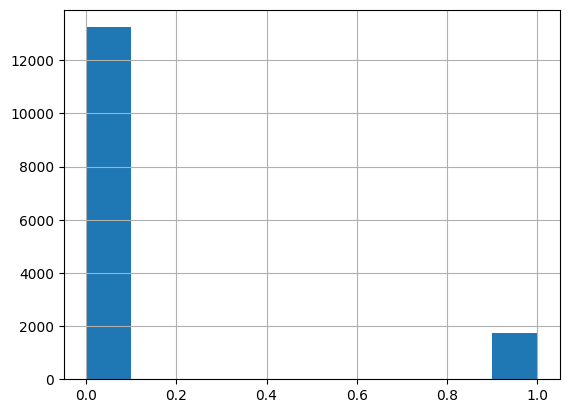

In [12]:
df_train['result_success'].hist();

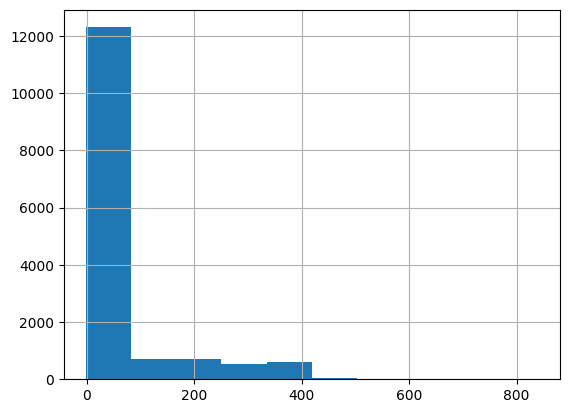

In [13]:
df_train['pdays'].hist();

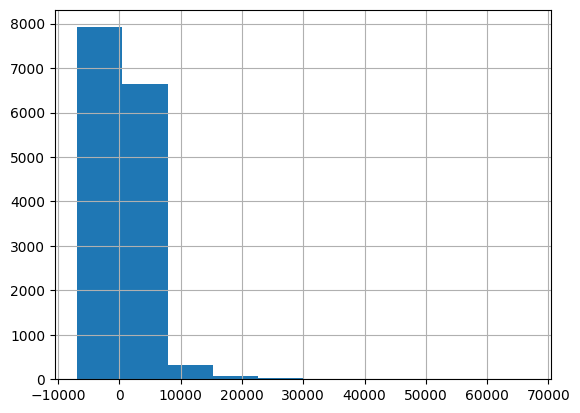

In [14]:
df_train['balance'].hist();

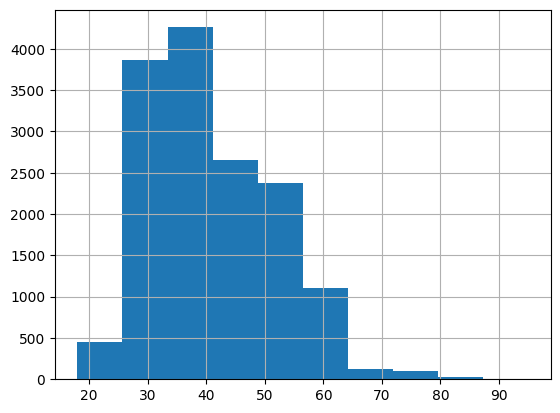

In [15]:
df_train['age'].hist();

In [16]:
df_train['result_success'].value_counts()

0    13242
1     1758
Name: result_success, dtype: int64

In [17]:
df_test = pd.read_csv('/content/drive/MyDrive/bank_pred.csv')
df_test.head()

,age,job,marital,education,default,balance,housing,loan,pdays,previous,poutcome
0,53,services,married,secondary,no,1364,no,no,-1,0,unknown
1,36,blue-collar,married,secondary,no,1949,yes,no,319,3,failure
2,40,admin.,married,unknown,no,3557,yes,no,-1,0,unknown
3,51,management,divorced,secondary,no,-175,yes,yes,-1,0,unknown
4,41,unemployed,married,secondary,no,277,yes,no,351,2,failure


In [18]:
df_test.shape

(10000, 11)

In [19]:
df_test.duplicated(keep=False)

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [20]:
df_test.duplicated(keep=False).value_counts()

False    9982
True       18
dtype: int64

In [21]:
df_test = pd.get_dummies(df_test, drop_first=True)

In [22]:
df_test

,age,balance,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,poutcome_other,poutcome_success,poutcome_unknown
0,53,1364,-1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,36,1949,319,3,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,40,3557,-1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,51,-175,-1,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
4,41,277,351,2,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,34,1076,-1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
9996,53,-834,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
9997,42,324,-1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
9998,38,231,-1,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1


In [23]:
x = df_train.drop('result_success', axis=1).values
t = df_train['result_success'].values

print(x.shape, t.shape)

(15000, 26) (15000,)


In [24]:
from sklearn.model_selection import train_test_split
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.2, random_state=0)

In [25]:
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.25, random_state=0)

In [26]:
print(x_train_val.shape)

(12000, 26)


In [27]:
print(x_test.shape)

(3000, 26)


In [28]:
print(t_train_val.shape)

(12000,)


In [29]:
print(t_test.shape)

(3000,)


In [30]:
# optuna のインストール
!pip install optuna

import optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00


In [31]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn import metrics

In [32]:
def objective(trial, x, t, cv):
    # 1. ハイパーパラメータごとに探索範囲を指定
    max_depth = trial.suggest_int('max_depth', 50, 1000)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 100)
    min_child_weight = trial.suggest_float('min_child_weight', 1, 100)
    gamma = trial.suggest_float('gamma', 0, 100)
    subsample = trial.suggest_float('subsample', 0, 1)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0, 1)
    reg_alpha = trial.suggest_float('reg_alpha', 0, 100)
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    reg_lambda = trial.suggest_float('reg_lambda', 0, 100)
    learning_rate = trial.suggest_float('learning_rate', 0.1, 0.5)
    #scale_pos_weight = trial.suggest_int('scale_pos_weight', 2610/390)


    # 2. 学習に使用するアルゴリズムを指定
    estimator = XGBClassifier(
      max_depth = max_depth,
      min_samples_split = min_samples_split,
      min_child_weight = min_child_weight,
      gamma = gamma,
      subsample = subsample,
      colsample_bytree = colsample_bytree,
      reg_alpha = reg_alpha,
      n_estimators = n_estimators,
      reg_lambda = reg_lambda,
      learning_rate = learning_rate,
      scale_pos_weight = 2610/390,
      tree_method = 'hist'
    )

    # 3. 学習の実行、検証結果の表示
    print('Current_params : ', trial.params)
    f1 = cross_val_score(estimator, x, t, cv=cv, scoring='f1').mean()
    return f1

In [33]:
# study オブジェクトの作成（最大化）
study = optuna.create_study(direction='maximize')

[I 2023-07-23 13:36:52,884] A new study created in memory with name: no-name-59189ba0-dbbf-4c9b-9c95-f9b912862818


In [34]:
# K 分割交差検証の K
cv = 5
# 目的関数の最適化
study.optimize(lambda trial: objective(trial, x_val, t_val, cv), n_trials=50)

print(study.best_trial)

Current_params :  {'max_depth': 241, 'min_samples_split': 92, 'min_child_weight': 73.13058025625413, 'gamma': 25.664438754390662, 'subsample': 0.787891172133365, 'colsample_bytree': 0.44077541354479244, 'reg_alpha': 54.7406315642265, 'n_estimators': 113, 'reg_lambda': 90.09069334514743, 'learning_rate': 0.18888756887464397}
[13:36:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.


[I 2023-07-23 13:36:53,182] Trial 0 finished with value: 0.33483760940408336 and parameters: {'max_depth': 241, 'min_samples_split': 92, 'min_child_weight': 73.13058025625413, 'gamma': 25.664438754390662, 'subsample': 0.787891172133365, 'colsample_bytree': 0.44077541354479244, 'reg_alpha': 54.7406315642265, 'n_estimators': 113, 'reg_lambda': 90.09069334514743, 'learning_rate': 0.18888756887464397}. Best is trial 0 with value: 0.33483760940408336.



[13:36:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 218, 'min_samples_split': 90, 'min_child_weight': 38.781719833049095, 'gamma': 22.02619423723697, 'subsample': 0.008141138473930831, 'colsample_bytree': 0.7672745452069298, 'reg_alpha': 29.547077659165478, 'n_estimators': 984, 'reg_lambda': 79.37801754209235, 'learning_rate': 0.2140188338791326}
[13:36:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:36:54,697] Trial 1 finished with value: 0.0 and parameters: {'max_depth': 218, 'min_samples_split': 90, 'min_child_weight': 38.781719833049095, 'gamma': 22.02619423723697, 'subsample': 0.008141138473930831, 'colsample_bytree': 0.7672745452069298, 'reg_alpha': 29.547077659165478, 'n_estimators': 984, 'reg_lambda': 79.37801754209235, 'learning_rate': 0.2140188338791326}. Best is trial 0 with value: 0.33483760940408336.


Current_params :  {'max_depth': 854, 'min_samples_split': 54, 'min_child_weight': 55.93337402349621, 'gamma': 24.74115728394469, 'subsample': 0.8236161458528679, 'colsample_bytree': 0.9584748932727071, 'reg_alpha': 78.84859404700877, 'n_estimators': 438, 'reg_lambda': 40.71467179240938, 'learning_rate': 0.10291328173798342}
[13:36:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:36:55,643] Trial 2 finished with value: 0.3337997302454555 and parameters: {'max_depth': 854, 'min_samples_split': 54, 'min_child_weight': 55.93337402349621, 'gamma': 24.74115728394469, 'subsample': 0.8236161458528679, 'colsample_bytree': 0.9584748932727071, 'reg_alpha': 78.84859404700877, 'n_estimators': 438, 'reg_lambda': 40.71467179240938, 'learning_rate': 0.10291328173798342}. Best is trial 0 with value: 0.33483760940408336.


Current_params :  {'max_depth': 712, 'min_samples_split': 41, 'min_child_weight': 28.352219124642808, 'gamma': 88.05957009908533, 'subsample': 0.07139150171361985, 'colsample_bytree': 0.9763637142325371, 'reg_alpha': 97.79144031597762, 'n_estimators': 913, 'reg_lambda': 11.093563220130154, 'learning_rate': 0.21593073615442573}
[13:36:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:55] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:36:56,776] Trial 3 finished with value: 0.0 and parameters: {'max_depth': 712, 'min_samples_split': 41, 'min_child_weight': 28.352219124642808, 'gamma': 88.05957009908533, 'subsample': 0.07139150171361985, 'colsample_bytree': 0.9763637142325371, 'reg_alpha': 97.79144031597762, 'n_estimators': 913, 'reg_lambda': 11.093563220130154, 'learning_rate': 0.21593073615442573}. Best is trial 0 with value: 0.33483760940408336.


Current_params :  {'max_depth': 98, 'min_samples_split': 54, 'min_child_weight': 66.78607944076886, 'gamma': 69.37276388161962, 'subsample': 0.5827861500143883, 'colsample_bytree': 0.47401238699075654, 'reg_alpha': 34.57402410255995, 'n_estimators': 543, 'reg_lambda': 15.481927253723383, 'learning_rate': 0.48501775476665654}
[13:36:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:56] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:36:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:03,938] Trial 4 finished with value: 0.31706687595731403 and parameters: {'max_depth': 98, 'min_samples_split': 54, 'min_child_weight': 66.78607944076886, 'gamma': 69.37276388161962, 'subsample': 0.5827861500143883, 'colsample_bytree': 0.47401238699075654, 'reg_alpha': 34.57402410255995, 'n_estimators': 543, 'reg_lambda': 15.481927253723383, 'learning_rate': 0.48501775476665654}. Best is trial 0 with value: 0.33483760940408336.


Current_params :  {'max_depth': 883, 'min_samples_split': 77, 'min_child_weight': 21.237215642117967, 'gamma': 93.18902622171694, 'subsample': 0.29898614769948817, 'colsample_bytree': 0.08190891299129843, 'reg_alpha': 84.7360540924911, 'n_estimators': 126, 'reg_lambda': 85.90894398345549, 'learning_rate': 0.334260263613867}
[13:37:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:06,229] Trial 5 finished with value: 0.0 and parameters: {'max_depth': 883, 'min_samples_split': 77, 'min_child_weight': 21.237215642117967, 'gamma': 93.18902622171694, 'subsample': 0.29898614769948817, 'colsample_bytree': 0.08190891299129843, 'reg_alpha': 84.7360540924911, 'n_estimators': 126, 'reg_lambda': 85.90894398345549, 'learning_rate': 0.334260263613867}. Best is trial 0 with value: 0.33483760940408336.


[13:37:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 590, 'min_samples_split': 62, 'min_child_weight': 89.42479697412702, 'gamma': 64.33840842662322, 'subsample': 0.8499613973856924, 'colsample_bytree': 0.78103629166891, 'reg_alpha': 91.04024550788778, 'n_estimators': 167, 'reg_lambda': 64.2634463522231, 'learning_rate': 0.3927147499196998}
[13:37:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:08] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:12,404] Trial 6 finished with value: 0.0 and parameters: {'max_depth': 590, 'min_samples_split': 62, 'min_child_weight': 89.42479697412702, 'gamma': 64.33840842662322, 'subsample': 0.8499613973856924, 'colsample_bytree': 0.78103629166891, 'reg_alpha': 91.04024550788778, 'n_estimators': 167, 'reg_lambda': 64.2634463522231, 'learning_rate': 0.3927147499196998}. Best is trial 0 with value: 0.33483760940408336.


Current_params :  {'max_depth': 904, 'min_samples_split': 93, 'min_child_weight': 38.02345495045055, 'gamma': 87.52484200259616, 'subsample': 0.7966978751453483, 'colsample_bytree': 0.4264042576044731, 'reg_alpha': 9.43363725268731, 'n_estimators': 110, 'reg_lambda': 69.44627409745347, 'learning_rate': 0.22887328277651592}
[13:37:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:17,782] Trial 7 finished with value: 0.2884755109313198 and parameters: {'max_depth': 904, 'min_samples_split': 93, 'min_child_weight': 38.02345495045055, 'gamma': 87.52484200259616, 'subsample': 0.7966978751453483, 'colsample_bytree': 0.4264042576044731, 'reg_alpha': 9.43363725268731, 'n_estimators': 110, 'reg_lambda': 69.44627409745347, 'learning_rate': 0.22887328277651592}. Best is trial 0 with value: 0.33483760940408336.


[13:37:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 887, 'min_samples_split': 19, 'min_child_weight': 35.64617624869357, 'gamma': 24.116028549631064, 'subsample': 0.6630822174366656, 'colsample_bytree': 0.9485978607009975, 'reg_alpha': 45.986171833740194, 'n_estimators': 216, 'reg_lambda': 95.56301922175784, 'learning_rate': 0.32241464109206175}
[13:37:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:23,280] Trial 8 finished with value: 0.34124642181144893 and parameters: {'max_depth': 887, 'min_samples_split': 19, 'min_child_weight': 35.64617624869357, 'gamma': 24.116028549631064, 'subsample': 0.6630822174366656, 'colsample_bytree': 0.9485978607009975, 'reg_alpha': 45.986171833740194, 'n_estimators': 216, 'reg_lambda': 95.56301922175784, 'learning_rate': 0.32241464109206175}. Best is trial 8 with value: 0.34124642181144893.


[13:37:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 160, 'min_samples_split': 3, 'min_child_weight': 49.27240530725283, 'gamma': 11.937123855550213, 'subsample': 0.25402766548264577, 'colsample_bytree': 0.32017199993493994, 'reg_alpha': 2.7465711119452507, 'n_estimators': 491, 'reg_lambda': 62.278081079847446, 'learning_rate': 0.24344638572315197}
[13:37:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:25,281] Trial 9 finished with value: 0.32360932307071666 and parameters: {'max_depth': 160, 'min_samples_split': 3, 'min_child_weight': 49.27240530725283, 'gamma': 11.937123855550213, 'subsample': 0.25402766548264577, 'colsample_bytree': 0.32017199993493994, 'reg_alpha': 2.7465711119452507, 'n_estimators': 491, 'reg_lambda': 62.278081079847446, 'learning_rate': 0.24344638572315197}. Best is trial 8 with value: 0.34124642181144893.


[13:37:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 497, 'min_samples_split': 16, 'min_child_weight': 6.084409916463656, 'gamma': 41.66289826713205, 'subsample': 0.9843378745673849, 'colsample_bytree': 0.6521847830312724, 'reg_alpha': 61.99674739586912, 'n_estimators': 364, 'reg_lambda': 99.02142154944548, 'learning_rate': 0.3943652368683599}
[13:37:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:25,878] Trial 10 finished with value: 0.32171490368843064 and parameters: {'max_depth': 497, 'min_samples_split': 16, 'min_child_weight': 6.084409916463656, 'gamma': 41.66289826713205, 'subsample': 0.9843378745673849, 'colsample_bytree': 0.6521847830312724, 'reg_alpha': 61.99674739586912, 'n_estimators': 364, 'reg_lambda': 99.02142154944548, 'learning_rate': 0.3943652368683599}. Best is trial 8 with value: 0.34124642181144893.


[13:37:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 363, 'min_samples_split': 29, 'min_child_weight': 74.10615582872825, 'gamma': 4.068730841438082, 'subsample': 0.61326456542545, 'colsample_bytree': 0.6181785235037627, 'reg_alpha': 56.767420543371735, 'n_estimators': 277, 'reg_lambda': 99.10874145240375, 'learning_rate': 0.12909431519278655}
[13:37:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:26,379] Trial 11 finished with value: 0.32632055996750176 and parameters: {'max_depth': 363, 'min_samples_split': 29, 'min_child_weight': 74.10615582872825, 'gamma': 4.068730841438082, 'subsample': 0.61326456542545, 'colsample_bytree': 0.6181785235037627, 'reg_alpha': 56.767420543371735, 'n_estimators': 277, 'reg_lambda': 99.10874145240375, 'learning_rate': 0.12909431519278655}. Best is trial 8 with value: 0.34124642181144893.


[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 318, 'min_samples_split': 72, 'min_child_weight': 96.02216566330299, 'gamma': 35.54849811468173, 'subsample': 0.6709218281455949, 'colsample_bytree': 0.2842729088107853, 'reg_alpha': 45.35414397637302, 'n_estimators': 273, 'reg_lambda': 84.31741176562491, 'learning_rate': 0.2904845394607198}
[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:26,846] Trial 12 finished with value: 0.3183626039980042 and parameters: {'max_depth': 318, 'min_samples_split': 72, 'min_child_weight': 96.02216566330299, 'gamma': 35.54849811468173, 'subsample': 0.6709218281455949, 'colsample_bytree': 0.2842729088107853, 'reg_alpha': 45.35414397637302, 'n_estimators': 273, 'reg_lambda': 84.31741176562491, 'learning_rate': 0.2904845394607198}. Best is trial 8 with value: 0.34124642181144893.


[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 702, 'min_samples_split': 24, 'min_child_weight': 74.37150125673716, 'gamma': 26.245563390029048, 'subsample': 0.46291908596938924, 'colsample_bytree': 0.595320679590144, 'reg_alpha': 60.492589997809965, 'n_estimators': 716, 'reg_lambda': 47.07425577871531, 'learning_rate': 0.16748995869490446}
[13:37:26] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:31,007] Trial 13 finished with value: 0.27409010935898337 and parameters: {'max_depth': 702, 'min_samples_split': 24, 'min_child_weight': 74.37150125673716, 'gamma': 26.245563390029048, 'subsample': 0.46291908596938924, 'colsample_bytree': 0.595320679590144, 'reg_alpha': 60.492589997809965, 'n_estimators': 716, 'reg_lambda': 47.07425577871531, 'learning_rate': 0.16748995869490446}. Best is trial 8 with value: 0.34124642181144893.


Current_params :  {'max_depth': 423, 'min_samples_split': 35, 'min_child_weight': 57.22292413183202, 'gamma': 1.141655952142763, 'subsample': 0.7088870005588381, 'colsample_bytree': 0.8424941484199499, 'reg_alpha': 74.82506756945676, 'n_estimators': 696, 'reg_lambda': 98.21253718229242, 'learning_rate': 0.1650239705026659}
[13:37:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:31] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:32,054] Trial 14 finished with value: 0.3496681609949396 and parameters: {'max_depth': 423, 'min_samples_split': 35, 'min_child_weight': 57.22292413183202, 'gamma': 1.141655952142763, 'subsample': 0.7088870005588381, 'colsample_bytree': 0.8424941484199499, 'reg_alpha': 74.82506756945676, 'n_estimators': 696, 'reg_lambda': 98.21253718229242, 'learning_rate': 0.1650239705026659}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 470, 'min_samples_split': 35, 'min_child_weight': 53.44934439585733, 'gamma': 3.0858098077684386, 'subsample': 0.6918497267268044, 'colsample_bytree': 0.8569533159215612, 'reg_alpha': 74.36909293765366, 'n_estimators': 665, 'reg_lambda': 99.73477728438561, 'learning_rate': 0.2880356788865629}
[13:37:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:33,029] Trial 15 finished with value: 0.34784280684080615 and parameters: {'max_depth': 470, 'min_samples_split': 35, 'min_child_weight': 53.44934439585733, 'gamma': 3.0858098077684386, 'subsample': 0.6918497267268044, 'colsample_bytree': 0.8569533159215612, 'reg_alpha': 74.36909293765366, 'n_estimators': 665, 'reg_lambda': 99.73477728438561, 'learning_rate': 0.2880356788865629}. Best is trial 14 with value: 0.3496681609949396.


[13:37:32] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 452, 'min_samples_split': 39, 'min_child_weight': 55.426779468173244, 'gamma': 7.738211417326628, 'subsample': 0.4953346821593437, 'colsample_bytree': 0.8381617646961592, 'reg_alpha': 72.17850411224161, 'n_estimators': 689, 'reg_lambda': 82.46322601288345, 'learning_rate': 0.14360972928388685}
[13:37:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:33] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:34,047] Trial 16 finished with value: 0.3374831338794348 and parameters: {'max_depth': 452, 'min_samples_split': 39, 'min_child_weight': 55.426779468173244, 'gamma': 7.738211417326628, 'subsample': 0.4953346821593437, 'colsample_bytree': 0.8381617646961592, 'reg_alpha': 72.17850411224161, 'n_estimators': 689, 'reg_lambda': 82.46322601288345, 'learning_rate': 0.14360972928388685}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 605, 'min_samples_split': 36, 'min_child_weight': 49.49179741372781, 'gamma': 0.8785854893989798, 'subsample': 0.9943502303251416, 'colsample_bytree': 0.8555182419822218, 'reg_alpha': 73.00331468757238, 'n_estimators': 673, 'reg_lambda': 75.97906016460195, 'learning_rate': 0.2768965431020476}
[13:37:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:35,028] Trial 17 finished with value: 0.340895122817259 and parameters: {'max_depth': 605, 'min_samples_split': 36, 'min_child_weight': 49.49179741372781, 'gamma': 0.8785854893989798, 'subsample': 0.9943502303251416, 'colsample_bytree': 0.8555182419822218, 'reg_alpha': 73.00331468757238, 'n_estimators': 673, 'reg_lambda': 75.97906016460195, 'learning_rate': 0.2768965431020476}. Best is trial 14 with value: 0.3496681609949396.


[13:37:34] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 409, 'min_samples_split': 11, 'min_child_weight': 62.52188757794376, 'gamma': 0.21999337355481474, 'subsample': 0.7070752266951981, 'colsample_bytree': 0.6887402781146136, 'reg_alpha': 86.21411954249795, 'n_estimators': 798, 'reg_lambda': 99.52472617655366, 'learning_rate': 0.1782178922769337}
[13:37:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:35] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:36,220] Trial 18 finished with value: 0.34853752395130255 and parameters: {'max_depth': 409, 'min_samples_split': 11, 'min_child_weight': 62.52188757794376, 'gamma': 0.21999337355481474, 'subsample': 0.7070752266951981, 'colsample_bytree': 0.6887402781146136, 'reg_alpha': 86.21411954249795, 'n_estimators': 798, 'reg_lambda': 99.52472617655366, 'learning_rate': 0.1782178922769337}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 286, 'min_samples_split': 3, 'min_child_weight': 83.65058442862828, 'gamma': 11.292571124494112, 'subsample': 0.5362704733499931, 'colsample_bytree': 0.6994419011523576, 'reg_alpha': 96.5355024147604, 'n_estimators': 822, 'reg_lambda': 89.74623305205796, 'learning_rate': 0.18035458918624442}
[13:37:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:36] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:37,360] Trial 19 finished with value: 0.30504110059957334 and parameters: {'max_depth': 286, 'min_samples_split': 3, 'min_child_weight': 83.65058442862828, 'gamma': 11.292571124494112, 'subsample': 0.5362704733499931, 'colsample_bytree': 0.6994419011523576, 'reg_alpha': 96.5355024147604, 'n_estimators': 822, 'reg_lambda': 89.74623305205796, 'learning_rate': 0.18035458918624442}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 373, 'min_samples_split': 12, 'min_child_weight': 62.207602485352, 'gamma': 15.0597024722448, 'subsample': 0.7211231442583511, 'colsample_bytree': 0.5680327006355647, 'reg_alpha': 86.65461293201986, 'n_estimators': 803, 'reg_lambda': 73.10857452695008, 'learning_rate': 0.10338979855754332}
[13:37:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:38,462] Trial 20 finished with value: 0.3377857228673618 and parameters: {'max_depth': 373, 'min_samples_split': 12, 'min_child_weight': 62.207602485352, 'gamma': 15.0597024722448, 'subsample': 0.7211231442583511, 'colsample_bytree': 0.5680327006355647, 'reg_alpha': 86.65461293201986, 'n_estimators': 803, 'reg_lambda': 73.10857452695008, 'learning_rate': 0.10338979855754332}. Best is trial 14 with value: 0.3496681609949396.


[13:37:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 435, 'min_samples_split': 31, 'min_child_weight': 62.65561171644392, 'gamma': 3.9594053288423394, 'subsample': 0.7053685418274349, 'colsample_bytree': 0.7363154999476622, 'reg_alpha': 75.28058185658536, 'n_estimators': 619, 'reg_lambda': 97.69668396600045, 'learning_rate': 0.15584006439668022}
[13:37:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:39,390] Trial 21 finished with value: 0.33947089793466356 and parameters: {'max_depth': 435, 'min_samples_split': 31, 'min_child_weight': 62.65561171644392, 'gamma': 3.9594053288423394, 'subsample': 0.7053685418274349, 'colsample_bytree': 0.7363154999476622, 'reg_alpha': 75.28058185658536, 'n_estimators': 619, 'reg_lambda': 97.69668396600045, 'learning_rate': 0.15584006439668022}. Best is trial 14 with value: 0.3496681609949396.


[13:37:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 571, 'min_samples_split': 48, 'min_child_weight': 47.062681508897455, 'gamma': 2.7047602288651706, 'subsample': 0.8845520075999489, 'colsample_bytree': 0.8716049954950296, 'reg_alpha': 68.56003337346526, 'n_estimators': 790, 'reg_lambda': 90.84967778130714, 'learning_rate': 0.2609511022562645}
[13:37:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:40,524] Trial 22 finished with value: 0.34499377799585246 and parameters: {'max_depth': 571, 'min_samples_split': 48, 'min_child_weight': 47.062681508897455, 'gamma': 2.7047602288651706, 'subsample': 0.8845520075999489, 'colsample_bytree': 0.8716049954950296, 'reg_alpha': 68.56003337346526, 'n_estimators': 790, 'reg_lambda': 90.84967778130714, 'learning_rate': 0.2609511022562645}. Best is trial 14 with value: 0.3496681609949396.


[13:37:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 704, 'min_samples_split': 10, 'min_child_weight': 58.090548839873556, 'gamma': 13.00338306432569, 'subsample': 0.7363894969370508, 'colsample_bytree': 0.7410380744225277, 'reg_alpha': 82.76489910833622, 'n_estimators': 604, 'reg_lambda': 89.65082008829489, 'learning_rate': 0.19282366541874446}
[13:37:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:42] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:44,564] Trial 23 finished with value: 0.3342653339994699 and parameters: {'max_depth': 704, 'min_samples_split': 10, 'min_child_weight': 58.090548839873556, 'gamma': 13.00338306432569, 'subsample': 0.7363894969370508, 'colsample_bytree': 0.7410380744225277, 'reg_alpha': 82.76489910833622, 'n_estimators': 604, 'reg_lambda': 89.65082008829489, 'learning_rate': 0.19282366541874446}. Best is trial 14 with value: 0.3496681609949396.


[13:37:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 420, 'min_samples_split': 25, 'min_child_weight': 67.5032004380686, 'gamma': 15.359504306156193, 'subsample': 0.6126455000155349, 'colsample_bytree': 0.865240903830688, 'reg_alpha': 89.02442325478845, 'n_estimators': 888, 'reg_lambda': 99.96863277912816, 'learning_rate': 0.14385507267606965}
[13:37:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:44] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:45,820] Trial 24 finished with value: 0.32857835868798524 and parameters: {'max_depth': 420, 'min_samples_split': 25, 'min_child_weight': 67.5032004380686, 'gamma': 15.359504306156193, 'subsample': 0.6126455000155349, 'colsample_bytree': 0.865240903830688, 'reg_alpha': 89.02442325478845, 'n_estimators': 888, 'reg_lambda': 99.96863277912816, 'learning_rate': 0.14385507267606965}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 505, 'min_samples_split': 44, 'min_child_weight': 45.8296688741015, 'gamma': 2.4951607713055095, 'subsample': 0.9048290195156443, 'colsample_bytree': 0.679577883996736, 'reg_alpha': 67.38756828567799, 'n_estimators': 740, 'reg_lambda': 80.55817314693492, 'learning_rate': 0.24195715624202146}
[13:37:45] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:46,879] Trial 25 finished with value: 0.3477889992273558 and parameters: {'max_depth': 505, 'min_samples_split': 44, 'min_child_weight': 45.8296688741015, 'gamma': 2.4951607713055095, 'subsample': 0.9048290195156443, 'colsample_bytree': 0.679577883996736, 'reg_alpha': 67.38756828567799, 'n_estimators': 740, 'reg_lambda': 80.55817314693492, 'learning_rate': 0.24195715624202146}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 383, 'min_samples_split': 30, 'min_child_weight': 57.02653566306231, 'gamma': 17.21705503355571, 'subsample': 0.7705067141672539, 'colsample_bytree': 0.7914988620695316, 'reg_alpha': 79.1724744508267, 'n_estimators': 621, 'reg_lambda': 92.01385056949889, 'learning_rate': 0.20612293326630557}
[13:37:46] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:47,800] Trial 26 finished with value: 0.3214020003976358 and parameters: {'max_depth': 383, 'min_samples_split': 30, 'min_child_weight': 57.02653566306231, 'gamma': 17.21705503355571, 'subsample': 0.7705067141672539, 'colsample_bytree': 0.7914988620695316, 'reg_alpha': 79.1724744508267, 'n_estimators': 621, 'reg_lambda': 92.01385056949889, 'learning_rate': 0.20612293326630557}. Best is trial 14 with value: 0.3496681609949396.


[13:37:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 651, 'min_samples_split': 22, 'min_child_weight': 82.87224908846025, 'gamma': 8.60517371300774, 'subsample': 0.6864737612709625, 'colsample_bytree': 0.9102587659168784, 'reg_alpha': 79.87926240536409, 'n_estimators': 879, 'reg_lambda': 82.74767695697321, 'learning_rate': 0.1792442490558479}
[13:37:47] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:48] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:49,039] Trial 27 finished with value: 0.33376572481870814 and parameters: {'max_depth': 651, 'min_samples_split': 22, 'min_child_weight': 82.87224908846025, 'gamma': 8.60517371300774, 'subsample': 0.6864737612709625, 'colsample_bytree': 0.9102587659168784, 'reg_alpha': 79.87926240536409, 'n_estimators': 879, 'reg_lambda': 82.74767695697321, 'learning_rate': 0.1792442490558479}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 787, 'min_samples_split': 34, 'min_child_weight': 66.58727754611945, 'gamma': 33.48649430139302, 'subsample': 0.7633188572685868, 'colsample_bytree': 0.8232819762691572, 'reg_alpha': 92.67342974579529, 'n_estimators': 745, 'reg_lambda': 93.01881031278316, 'learning_rate': 0.2604445045002982}
[13:37:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:50,105] Trial 28 finished with value: 0.3024131699618361 and parameters: {'max_depth': 787, 'min_samples_split': 34, 'min_child_weight': 66.58727754611945, 'gamma': 33.48649430139302, 'subsample': 0.7633188572685868, 'colsample_bytree': 0.8232819762691572, 'reg_alpha': 92.67342974579529, 'n_estimators': 745, 'reg_lambda': 93.01881031278316, 'learning_rate': 0.2604445045002982}. Best is trial 14 with value: 0.3496681609949396.


[13:37:49] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 227, 'min_samples_split': 60, 'min_child_weight': 73.3467612024782, 'gamma': 0.11360631028823931, 'subsample': 0.8110613859501598, 'colsample_bytree': 0.9153728165637034, 'reg_alpha': 64.23335370936783, 'n_estimators': 981, 'reg_lambda': 88.4572214656036, 'learning_rate': 0.18989436006789537}
[13:37:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:50] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:51,553] Trial 29 finished with value: 0.3492950193025461 and parameters: {'max_depth': 227, 'min_samples_split': 60, 'min_child_weight': 73.3467612024782, 'gamma': 0.11360631028823931, 'subsample': 0.8110613859501598, 'colsample_bytree': 0.9153728165637034, 'reg_alpha': 64.23335370936783, 'n_estimators': 981, 'reg_lambda': 88.4572214656036, 'learning_rate': 0.18989436006789537}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 243, 'min_samples_split': 62, 'min_child_weight': 74.36480403341253, 'gamma': 18.938169076321664, 'subsample': 0.8313285693871094, 'colsample_bytree': 0.9217545843544266, 'reg_alpha': 66.14754351767834, 'n_estimators': 996, 'reg_lambda': 88.2916518549603, 'learning_rate': 0.18983676052781168}
[13:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:51] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:52,918] Trial 30 finished with value: 0.3150369656059145 and parameters: {'max_depth': 243, 'min_samples_split': 62, 'min_child_weight': 74.36480403341253, 'gamma': 18.938169076321664, 'subsample': 0.8313285693871094, 'colsample_bytree': 0.9217545843544266, 'reg_alpha': 66.14754351767834, 'n_estimators': 996, 'reg_lambda': 88.2916518549603, 'learning_rate': 0.18983676052781168}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 67, 'min_samples_split': 62, 'min_child_weight': 70.2192227185844, 'gamma': 9.378070146061836, 'subsample': 0.7601811856131362, 'colsample_bytree': 0.9934865202468679, 'reg_alpha': 76.76545180072445, 'n_estimators': 935, 'reg_lambda': 99.47573062926753, 'learning_rate': 0.16739034516559026}
[13:37:52] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:53] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:54,234] Trial 31 finished with value: 0.33501629426954477 and parameters: {'max_depth': 67, 'min_samples_split': 62, 'min_child_weight': 70.2192227185844, 'gamma': 9.378070146061836, 'subsample': 0.7601811856131362, 'colsample_bytree': 0.9934865202468679, 'reg_alpha': 76.76545180072445, 'n_estimators': 935, 'reg_lambda': 99.47573062926753, 'learning_rate': 0.16739034516559026}. Best is trial 14 with value: 0.3496681609949396.


Current_params :  {'max_depth': 166, 'min_samples_split': 74, 'min_child_weight': 53.33141376211318, 'gamma': 0.3279603765400836, 'subsample': 0.9089521363179682, 'colsample_bytree': 0.7926189181099654, 'reg_alpha': 70.21951533941956, 'n_estimators': 823, 'reg_lambda': 92.81719163374676, 'learning_rate': 0.20753441936149902}
[13:37:54] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:57] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:58,579] Trial 32 finished with value: 0.3525899959572719 and parameters: {'max_depth': 166, 'min_samples_split': 74, 'min_child_weight': 53.33141376211318, 'gamma': 0.3279603765400836, 'subsample': 0.9089521363179682, 'colsample_bytree': 0.7926189181099654, 'reg_alpha': 70.21951533941956, 'n_estimators': 823, 'reg_lambda': 92.81719163374676, 'learning_rate': 0.20753441936149902}. Best is trial 32 with value: 0.3525899959572719.


Current_params :  {'max_depth': 180, 'min_samples_split': 77, 'min_child_weight': 61.79664505856163, 'gamma': 1.4545521409325446, 'subsample': 0.9294367018584933, 'colsample_bytree': 0.7635477059724181, 'reg_alpha': 52.82714832289092, 'n_estimators': 865, 'reg_lambda': 77.9202747525075, 'learning_rate': 0.20646133779642795}
[13:37:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:37:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:37:59,827] Trial 33 finished with value: 0.35447049513459794 and parameters: {'max_depth': 180, 'min_samples_split': 77, 'min_child_weight': 61.79664505856163, 'gamma': 1.4545521409325446, 'subsample': 0.9294367018584933, 'colsample_bytree': 0.7635477059724181, 'reg_alpha': 52.82714832289092, 'n_estimators': 865, 'reg_lambda': 77.9202747525075, 'learning_rate': 0.20646133779642795}. Best is trial 33 with value: 0.35447049513459794.


Current_params :  {'max_depth': 162, 'min_samples_split': 85, 'min_child_weight': 78.44674593200095, 'gamma': 19.76326365269614, 'subsample': 0.9193708384934055, 'colsample_bytree': 0.7802485186009207, 'reg_alpha': 52.60071129598958, 'n_estimators': 943, 'reg_lambda': 76.57413150120871, 'learning_rate': 0.21677991885441444}
[13:37:59] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:00] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:01,130] Trial 34 finished with value: 0.33700812709654576 and parameters: {'max_depth': 162, 'min_samples_split': 85, 'min_child_weight': 78.44674593200095, 'gamma': 19.76326365269614, 'subsample': 0.9193708384934055, 'colsample_bytree': 0.7802485186009207, 'reg_alpha': 52.60071129598958, 'n_estimators': 943, 'reg_lambda': 76.57413150120871, 'learning_rate': 0.21677991885441444}. Best is trial 33 with value: 0.35447049513459794.


Current_params :  {'max_depth': 985, 'min_samples_split': 75, 'min_child_weight': 43.860240641308394, 'gamma': 9.159087666998001, 'subsample': 0.9384329386372183, 'colsample_bytree': 0.9163793752523852, 'reg_alpha': 61.432817861410385, 'n_estimators': 876, 'reg_lambda': 79.24245083153868, 'learning_rate': 0.20930061115770127}
[13:38:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:01] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:02,377] Trial 35 finished with value: 0.34471582708518456 and parameters: {'max_depth': 985, 'min_samples_split': 75, 'min_child_weight': 43.860240641308394, 'gamma': 9.159087666998001, 'subsample': 0.9384329386372183, 'colsample_bytree': 0.9163793752523852, 'reg_alpha': 61.432817861410385, 'n_estimators': 876, 'reg_lambda': 79.24245083153868, 'learning_rate': 0.20930061115770127}. Best is trial 33 with value: 0.35447049513459794.


Current_params :  {'max_depth': 164, 'min_samples_split': 84, 'min_child_weight': 57.102638018122306, 'gamma': 6.507052612724074, 'subsample': 0.8696340931378531, 'colsample_bytree': 0.997909338271245, 'reg_alpha': 52.88816292191354, 'n_estimators': 845, 'reg_lambda': 87.83563571737193, 'learning_rate': 0.12348932013684813}
[13:38:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:02] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:03,603] Trial 36 finished with value: 0.3487995018425771 and parameters: {'max_depth': 164, 'min_samples_split': 84, 'min_child_weight': 57.102638018122306, 'gamma': 6.507052612724074, 'subsample': 0.8696340931378531, 'colsample_bytree': 0.997909338271245, 'reg_alpha': 52.88816292191354, 'n_estimators': 845, 'reg_lambda': 87.83563571737193, 'learning_rate': 0.12348932013684813}. Best is trial 33 with value: 0.35447049513459794.


Current_params :  {'max_depth': 252, 'min_samples_split': 67, 'min_child_weight': 52.09849786238448, 'gamma': 22.602544134192097, 'subsample': 0.8233973683656145, 'colsample_bytree': 0.7340079614490047, 'reg_alpha': 66.6985318171609, 'n_estimators': 954, 'reg_lambda': 92.78659882600387, 'learning_rate': 0.1573602724666149}
[13:38:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:03] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:04] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:04,935] Trial 37 finished with value: 0.33723154521401305 and parameters: {'max_depth': 252, 'min_samples_split': 67, 'min_child_weight': 52.09849786238448, 'gamma': 22.602544134192097, 'subsample': 0.8233973683656145, 'colsample_bytree': 0.7340079614490047, 'reg_alpha': 66.6985318171609, 'n_estimators': 954, 'reg_lambda': 92.78659882600387, 'learning_rate': 0.1573602724666149}. Best is trial 33 with value: 0.35447049513459794.


Current_params :  {'max_depth': 196, 'min_samples_split': 55, 'min_child_weight': 69.2299421937779, 'gamma': 0.13701794603449943, 'subsample': 0.9471383694630388, 'colsample_bytree': 0.8031923132326309, 'reg_alpha': 48.218788753157924, 'n_estimators': 760, 'reg_lambda': 85.45857714331704, 'learning_rate': 0.20188140990435383}
[13:38:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:05] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:06,083] Trial 38 finished with value: 0.35478550495684225 and parameters: {'max_depth': 196, 'min_samples_split': 55, 'min_child_weight': 69.2299421937779, 'gamma': 0.13701794603449943, 'subsample': 0.9471383694630388, 'colsample_bytree': 0.8031923132326309, 'reg_alpha': 48.218788753157924, 'n_estimators': 760, 'reg_lambda': 85.45857714331704, 'learning_rate': 0.20188140990435383}. Best is trial 38 with value: 0.35478550495684225.


Current_params :  {'max_depth': 129, 'min_samples_split': 98, 'min_child_weight': 61.27174055740766, 'gamma': 14.715532252915171, 'subsample': 0.9460759160601011, 'colsample_bytree': 0.789238674978414, 'reg_alpha': 48.06823061572625, 'n_estimators': 553, 'reg_lambda': 70.4118143519642, 'learning_rate': 0.22526150652625515}
[13:38:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:06,899] Trial 39 finished with value: 0.3436276808601661 and parameters: {'max_depth': 129, 'min_samples_split': 98, 'min_child_weight': 61.27174055740766, 'gamma': 14.715532252915171, 'subsample': 0.9460759160601011, 'colsample_bytree': 0.789238674978414, 'reg_alpha': 48.06823061572625, 'n_estimators': 553, 'reg_lambda': 70.4118143519642, 'learning_rate': 0.22526150652625515}. Best is trial 38 with value: 0.35478550495684225.


[13:38:06] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 51, 'min_samples_split': 53, 'min_child_weight': 43.505000904201744, 'gamma': 10.076648780377546, 'subsample': 0.886731545172102, 'colsample_bytree': 0.8025618989028256, 'reg_alpha': 43.665561422382254, 'n_estimators': 773, 'reg_lambda': 64.82820396608649, 'learning_rate': 0.2327252817798691}
[13:38:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:07] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:11,115] Trial 40 finished with value: 0.3474623966779316 and parameters: {'max_depth': 51, 'min_samples_split': 53, 'min_child_weight': 43.505000904201744, 'gamma': 10.076648780377546, 'subsample': 0.886731545172102, 'colsample_bytree': 0.8025618989028256, 'reg_alpha': 43.665561422382254, 'n_estimators': 773, 'reg_lambda': 64.82820396608649, 'learning_rate': 0.2327252817798691}. Best is trial 38 with value: 0.35478550495684225.


[13:38:10] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 211, 'min_samples_split': 81, 'min_child_weight': 68.60693683491233, 'gamma': 0.10320233727368391, 'subsample': 0.808240620743506, 'colsample_bytree': 0.9071699772272552, 'reg_alpha': 54.58028826265459, 'n_estimators': 842, 'reg_lambda': 86.11428971310578, 'learning_rate': 0.21483613665783569}
[13:38:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:11] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:12,454] Trial 41 finished with value: 0.3473139259072121 and parameters: {'max_depth': 211, 'min_samples_split': 81, 'min_child_weight': 68.60693683491233, 'gamma': 0.10320233727368391, 'subsample': 0.808240620743506, 'colsample_bytree': 0.9071699772272552, 'reg_alpha': 54.58028826265459, 'n_estimators': 842, 'reg_lambda': 86.11428971310578, 'learning_rate': 0.21483613665783569}. Best is trial 38 with value: 0.35478550495684225.


Current_params :  {'max_depth': 206, 'min_samples_split': 58, 'min_child_weight': 65.25919577179954, 'gamma': 6.241673957787084, 'subsample': 0.9557329494819307, 'colsample_bytree': 0.9588402723928006, 'reg_alpha': 37.73785361652436, 'n_estimators': 905, 'reg_lambda': 93.67237180998544, 'learning_rate': 0.19880567810875852}
[13:38:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:12] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:13,713] Trial 42 finished with value: 0.3571569752792717 and parameters: {'max_depth': 206, 'min_samples_split': 58, 'min_child_weight': 65.25919577179954, 'gamma': 6.241673957787084, 'subsample': 0.9557329494819307, 'colsample_bytree': 0.9588402723928006, 'reg_alpha': 37.73785361652436, 'n_estimators': 905, 'reg_lambda': 93.67237180998544, 'learning_rate': 0.19880567810875852}. Best is trial 42 with value: 0.3571569752792717.


Current_params :  {'max_depth': 326, 'min_samples_split': 68, 'min_child_weight': 52.681537390726994, 'gamma': 6.086072432862114, 'subsample': 0.9998040584522305, 'colsample_bytree': 0.9633880049436198, 'reg_alpha': 38.2732759187455, 'n_estimators': 889, 'reg_lambda': 94.50675419882813, 'learning_rate': 0.1928530073565288}
[13:38:13] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:14] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:14,963] Trial 43 finished with value: 0.3444348852941287 and parameters: {'max_depth': 326, 'min_samples_split': 68, 'min_child_weight': 52.681537390726994, 'gamma': 6.086072432862114, 'subsample': 0.9998040584522305, 'colsample_bytree': 0.9633880049436198, 'reg_alpha': 38.2732759187455, 'n_estimators': 889, 'reg_lambda': 94.50675419882813, 'learning_rate': 0.1928530073565288}. Best is trial 42 with value: 0.3571569752792717.


Current_params :  {'max_depth': 92, 'min_samples_split': 48, 'min_child_weight': 64.96508925098394, 'gamma': 6.610898282323748, 'subsample': 0.9477116656946332, 'colsample_bytree': 0.8312741402563192, 'reg_alpha': 23.780309492461246, 'n_estimators': 743, 'reg_lambda': 82.3235717803951, 'learning_rate': 0.24514379222070878}
[13:38:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:16,044] Trial 44 finished with value: 0.351575285285416 and parameters: {'max_depth': 92, 'min_samples_split': 48, 'min_child_weight': 64.96508925098394, 'gamma': 6.610898282323748, 'subsample': 0.9477116656946332, 'colsample_bytree': 0.8312741402563192, 'reg_alpha': 23.780309492461246, 'n_estimators': 743, 'reg_lambda': 82.3235717803951, 'learning_rate': 0.24514379222070878}. Best is trial 42 with value: 0.3571569752792717.


[13:38:15] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 105, 'min_samples_split': 47, 'min_child_weight': 63.7568261624149, 'gamma': 6.530523621319381, 'subsample': 0.9609774793326017, 'colsample_bytree': 0.7557970150734462, 'reg_alpha': 24.25625065174467, 'n_estimators': 753, 'reg_lambda': 79.3153580561614, 'learning_rate': 0.24513518224994185}
[13:38:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:16] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:17,105] Trial 45 finished with value: 0.35494485400305126 and parameters: {'max_depth': 105, 'min_samples_split': 47, 'min_child_weight': 63.7568261624149, 'gamma': 6.530523621319381, 'subsample': 0.9609774793326017, 'colsample_bytree': 0.7557970150734462, 'reg_alpha': 24.25625065174467, 'n_estimators': 753, 'reg_lambda': 79.3153580561614, 'learning_rate': 0.24513518224994185}. Best is trial 42 with value: 0.3571569752792717.


Current_params :  {'max_depth': 200, 'min_samples_split': 56, 'min_child_weight': 68.89225197907686, 'gamma': 27.419718365390818, 'subsample': 0.8609360654688367, 'colsample_bytree': 0.7480264464118518, 'reg_alpha': 31.648181882301273, 'n_estimators': 413, 'reg_lambda': 77.41324580491394, 'learning_rate': 0.21193015122565062}
[13:38:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:17,782] Trial 46 finished with value: 0.3426568205291887 and parameters: {'max_depth': 200, 'min_samples_split': 56, 'min_child_weight': 68.89225197907686, 'gamma': 27.419718365390818, 'subsample': 0.8609360654688367, 'colsample_bytree': 0.7480264464118518, 'reg_alpha': 31.648181882301273, 'n_estimators': 413, 'reg_lambda': 77.41324580491394, 'learning_rate': 0.21193015122565062}. Best is trial 42 with value: 0.3571569752792717.


[13:38:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

Current_params :  {'max_depth': 130, 'min_samples_split': 68, 'min_child_weight': 61.26593177364172, 'gamma': 19.790669694938497, 'subsample': 0.9590684214400542, 'colsample_bytree': 0.9546353943651441, 'reg_alpha': 26.141989628993663, 'n_estimators': 839, 'reg_lambda': 60.51363089661767, 'learning_rate': 0.23411213003269774}
[13:38:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:18] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:18,961] Trial 47 finished with value: 0.3561540394981961 and parameters: {'max_depth': 130, 'min_samples_split': 68, 'min_child_weight': 61.26593177364172, 'gamma': 19.790669694938497, 'subsample': 0.9590684214400542, 'colsample_bytree': 0.9546353943651441, 'reg_alpha': 26.141989628993663, 'n_estimators': 839, 'reg_lambda': 60.51363089661767, 'learning_rate': 0.23411213003269774}. Best is trial 42 with value: 0.3571569752792717.


Current_params :  {'max_depth': 114, 'min_samples_split': 68, 'min_child_weight': 61.156219957360676, 'gamma': 18.969520644137965, 'subsample': 0.9583928182154187, 'colsample_bytree': 0.9579516219011979, 'reg_alpha': 26.220215445394178, 'n_estimators': 915, 'reg_lambda': 60.255508948022964, 'learning_rate': 0.2344619337080696}
[13:38:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:20,236] Trial 48 finished with value: 0.3559393411335159 and parameters: {'max_depth': 114, 'min_samples_split': 68, 'min_child_weight': 61.156219957360676, 'gamma': 18.969520644137965, 'subsample': 0.9583928182154187, 'colsample_bytree': 0.9579516219011979, 'reg_alpha': 26.220215445394178, 'n_estimators': 915, 'reg_lambda': 60.255508948022964, 'learning_rate': 0.2344619337080696}. Best is trial 42 with value: 0.3571569752792717.


Current_params :  {'max_depth': 114, 'min_samples_split': 66, 'min_child_weight': 71.88750110031673, 'gamma': 21.226016030379817, 'subsample': 0.9691209117113766, 'colsample_bytree': 0.9544876193924963, 'reg_alpha': 25.33941291338446, 'n_estimators': 928, 'reg_lambda': 57.54924270596875, 'learning_rate': 0.25451635762705216}
[13:38:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

[13:38:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



[I 2023-07-23 13:38:24,689] Trial 49 finished with value: 0.35194130218789543 and parameters: {'max_depth': 114, 'min_samples_split': 66, 'min_child_weight': 71.88750110031673, 'gamma': 21.226016030379817, 'subsample': 0.9691209117113766, 'colsample_bytree': 0.9544876193924963, 'reg_alpha': 25.33941291338446, 'n_estimators': 928, 'reg_lambda': 57.54924270596875, 'learning_rate': 0.25451635762705216}. Best is trial 42 with value: 0.3571569752792717.


FrozenTrial(number=42, state=TrialState.COMPLETE, values=[0.3571569752792717], datetime_start=datetime.datetime(2023, 7, 23, 13, 38, 12, 456819), datetime_complete=datetime.datetime(2023, 7, 23, 13, 38, 13, 712486), params={'max_depth': 206, 'min_samples_split': 58, 'min_child_weight': 65.25919577179954, 'gamma': 6.241673957787084, 'subsample': 0.9557329494819307, 'colsample_bytree': 0.9588402723928006, 'reg_alpha': 37.73785361652436, 'n_estimators': 905, 'reg_lambda': 93.67237180998544, 'learning_rate': 0.19880567810875852}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=1000, log=False, low=50, step=1), 'min_samples_split': IntDistribution(high=100, log=False, low=2, step=1), 'min_child_weight': FloatDistribution(high=100.0, log=False, low=1.0, step=None), 'gamma': FloatDistribution(high=100.0, log=False, low=0.0, step=None), 'subsample': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'colsample_bytree': FloatDist

In [35]:
# 最も予測精度の高かったハイパーパラメータの確認
study.best_params

{'max_depth': 206,
 'min_samples_split': 58,
 'min_child_weight': 65.25919577179954,
 'gamma': 6.241673957787084,
 'subsample': 0.9557329494819307,
 'colsample_bytree': 0.9588402723928006,
 'reg_alpha': 37.73785361652436,
 'n_estimators': 905,
 'reg_lambda': 93.67237180998544,
 'learning_rate': 0.19880567810875852}

In [36]:
# 最適なハイパーパラメータを設定したモデルの定義
best_model = XGBClassifier(**study.best_params)

# モデルの学習
best_model.fit(x_train_val, t_train_val)

# モデルの検証
print(best_model.score(x_train_val, t_train_val))
print(best_model.score(x_test, t_test))

[13:38:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

0.8944166666666666
0.881


In [37]:
# 推論
y_pred = best_model.predict(x_test)

In [38]:
np.unique(y_pred)

array([0, 1])

In [39]:
from sklearn import metrics

In [40]:
# 混同行列の作成
labels = list(set(t))
c_matrix = metrics.confusion_matrix(t_test, y_pred, labels=labels)

In [41]:
c_matrix

array([[2596,   14],
       [ 343,   47]])

In [42]:
# DataFrameに整形
df_matrix = pd.DataFrame(c_matrix, columns=labels, index=labels)
df_matrix

,0,1
0,2596,14
1,343,47


Text(50.722222222222214, 0.5, 'Target')

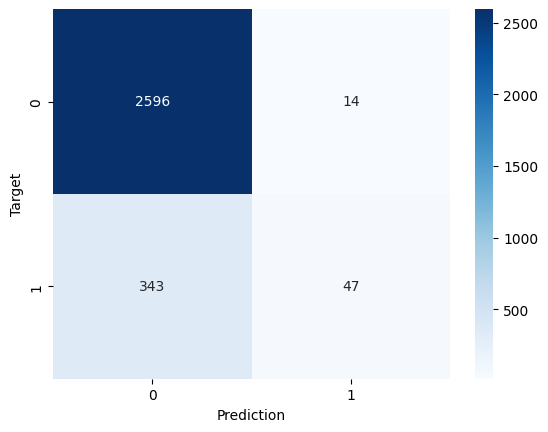

In [43]:
# ヒートマップで表示
sns.heatmap(df_matrix, annot=True, fmt='.0f', cmap='Blues');
plt.xlabel('Prediction')
plt.ylabel('Target')

In [44]:
precision, recall, f1_score, total = metrics.precision_recall_fscore_support(t_test, y_pred)

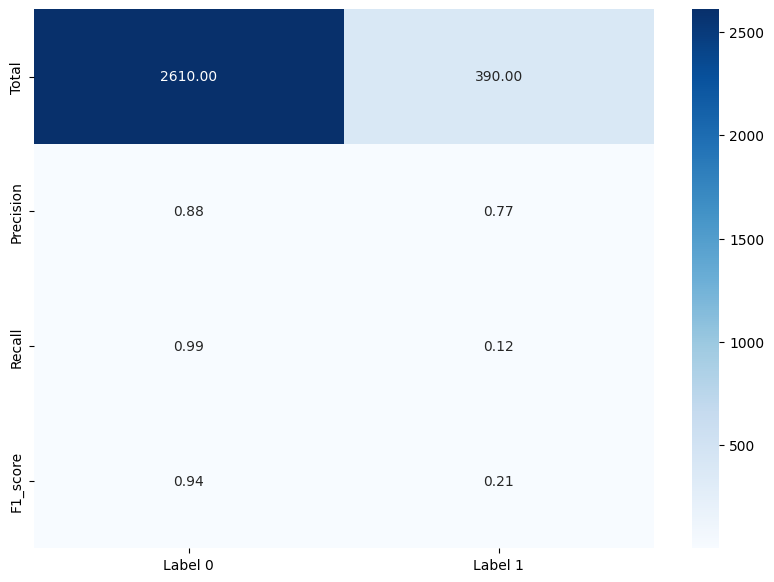

In [45]:
# ヒートマップで可視化
df_total = pd.DataFrame(
    np.array([total, precision, recall, f1_score]),
    index=['Total', 'Precision', 'Recall', 'F1_score'],
    columns=['Label 0','Label 1']
)

plt.figure(figsize=(10, 7))
sns.heatmap(df_total, annot=True, fmt='.2f', cmap='Blues');

In [46]:
y_proba = best_model.predict_proba(x_test)
y_proba[3]

array([0.9440795 , 0.05592046], dtype=float32)

Text(0, 0.5, 'Count')

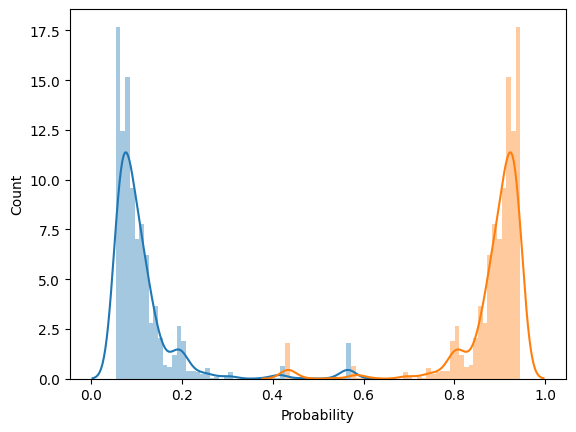

In [47]:
sns.distplot(y_proba[:, 1])
sns.distplot(y_proba[:, 0])
plt.xlabel('Probability')
plt.ylabel('Count')

In [48]:
x = df_test.values

print(x.shape)

(10000, 26)


In [49]:
# 推論
y_pred = best_model.predict(x)

In [50]:
np.unique(y_pred)

array([0, 1])

In [51]:
# 推論結果を、 success, fail に書き換える
y_list = []
y_list = np.where(y_pred, 'success', 'fail').tolist()
print(y_list)

['fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'success', 'fai

In [52]:
len(y_list)

10000

In [53]:
import collections

c = collections.Counter(y_list)

In [54]:
c

Counter({'fail': 9789, 'success': 211})

In [55]:
pd.Series(y_list, name='pred').to_csv('submission.csv', index=None),

(None,)